<a href="https://colab.research.google.com/github/MhyrnB/Data-Sci/blob/main/Mhyrn's_Copy_of_Hahn_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

*All the runs above are settng the agolrithm up for taking a URL and printing out the images from the file.* 

In [4]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

*Here lies Professor's URL of the difefrence between cats and dogs*

In [5]:
url = "https://docs.google.com/presentation/d/1zxGOnXuP0SMFqGQTN0VVW1gdkaJX3NOPsm44Km1mhkU/edit#slide=id.g19b8867b70f_0_17"

*Here is my URL of the difference between a collection of fruits and a collection of vegetables*

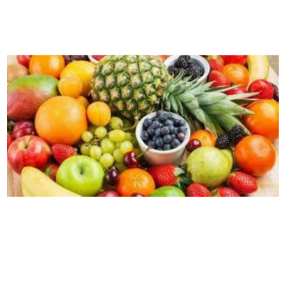

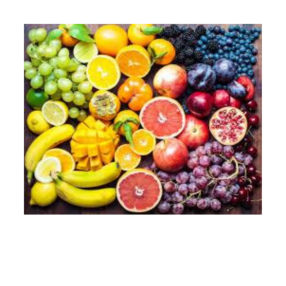

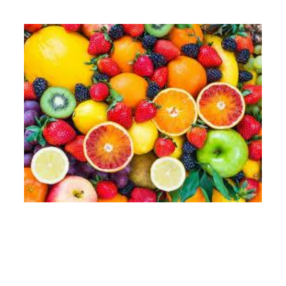

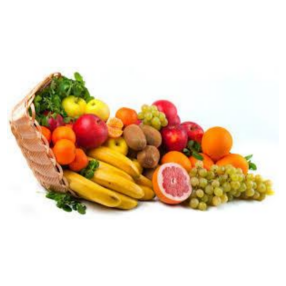

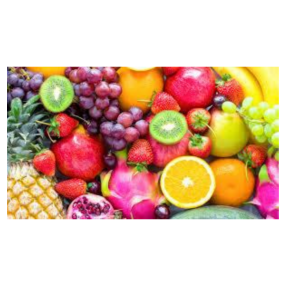

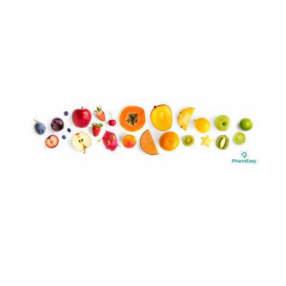

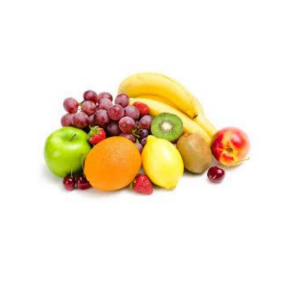

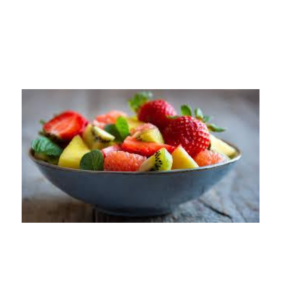

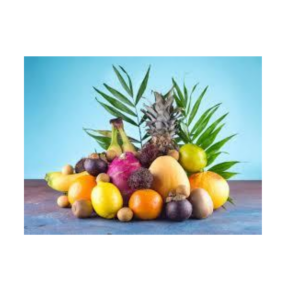

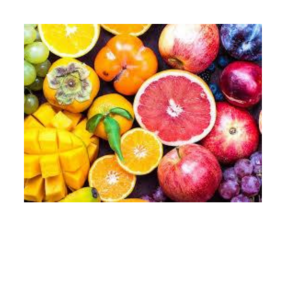

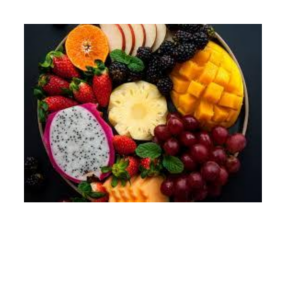

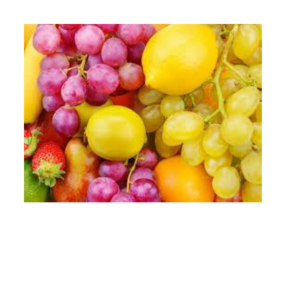

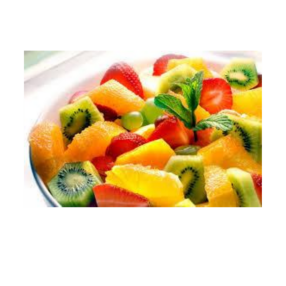

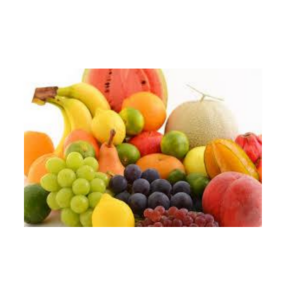

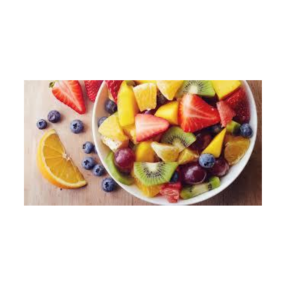

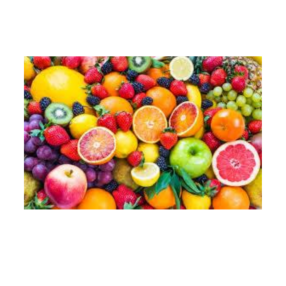

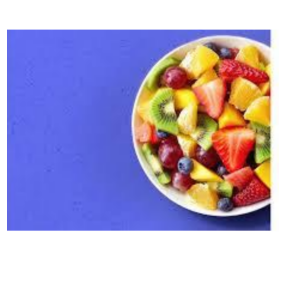

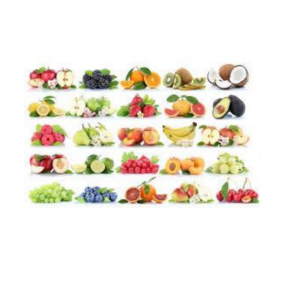

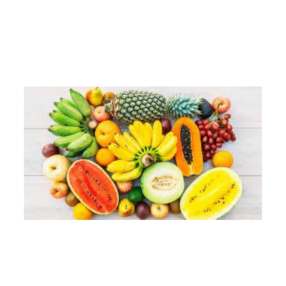

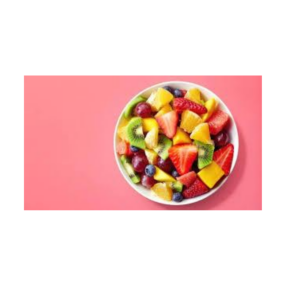

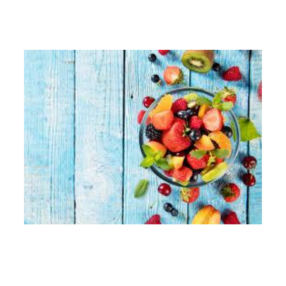

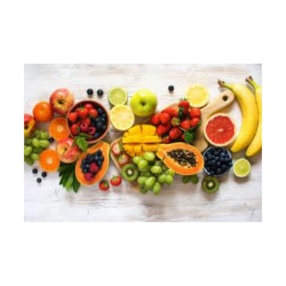

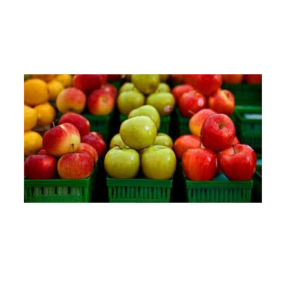

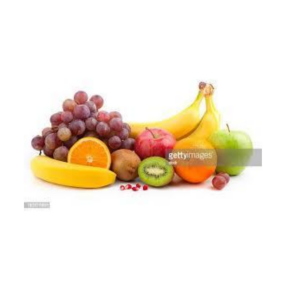

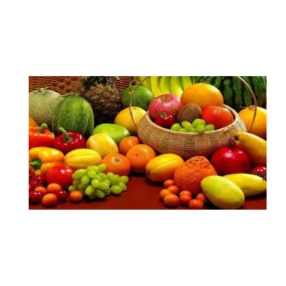

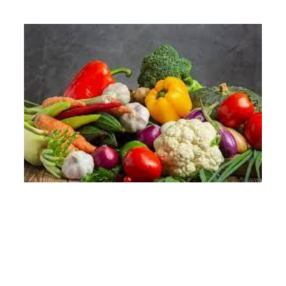

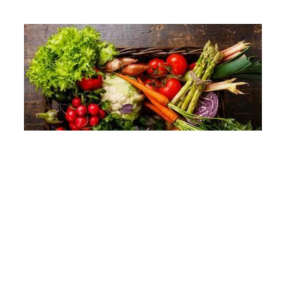

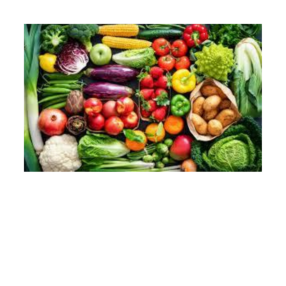

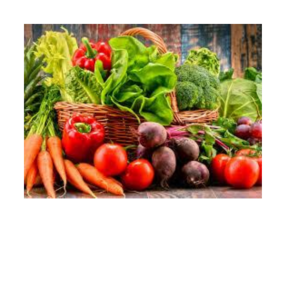

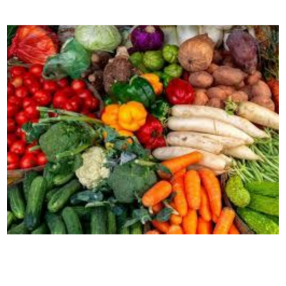

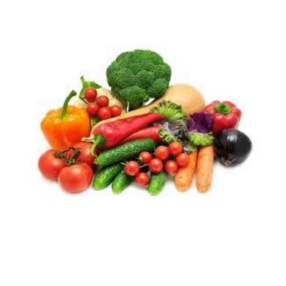

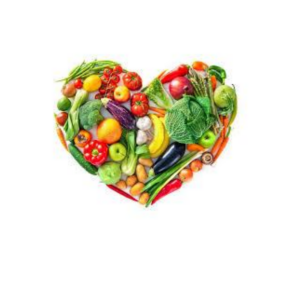

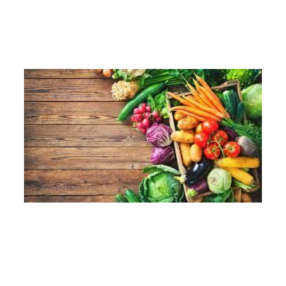

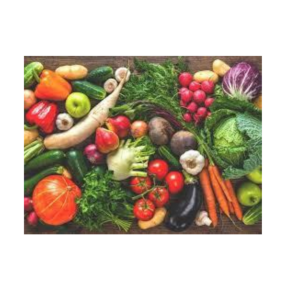

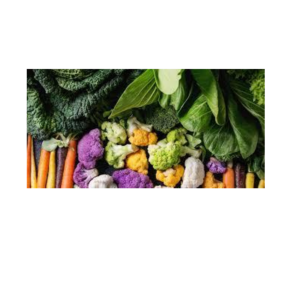

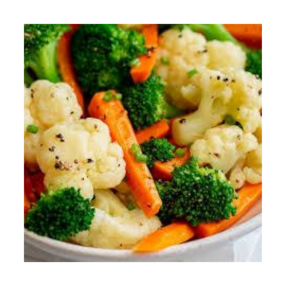

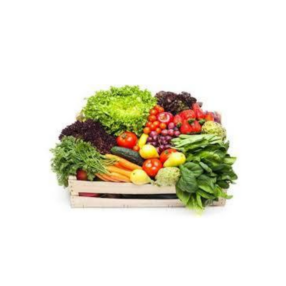

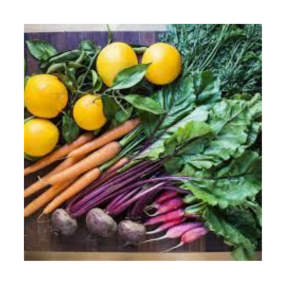

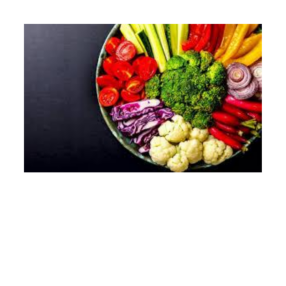

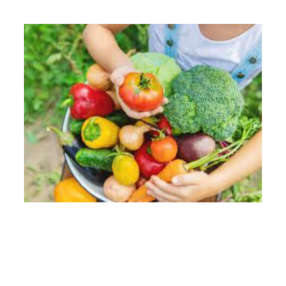

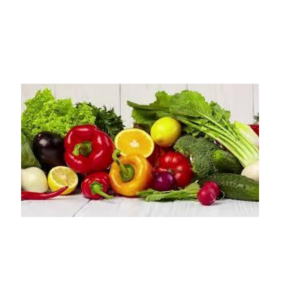

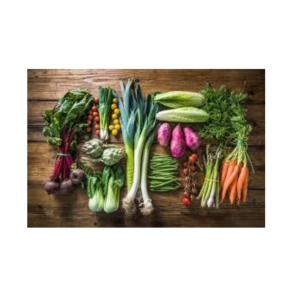

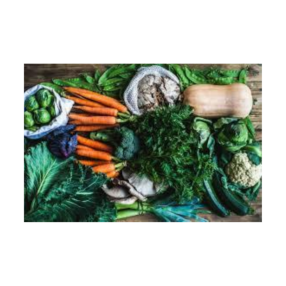

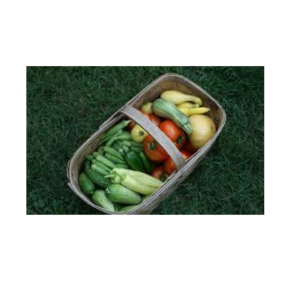

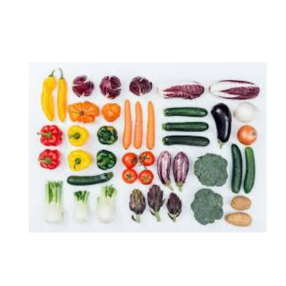

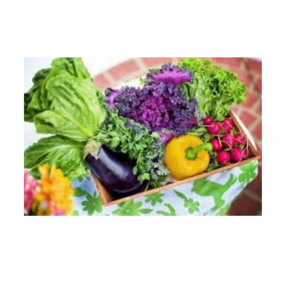

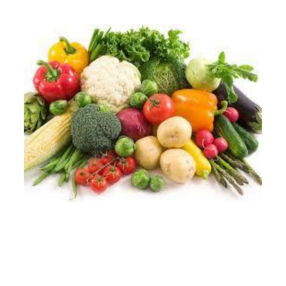

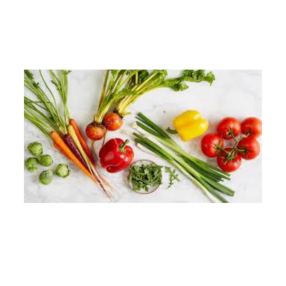

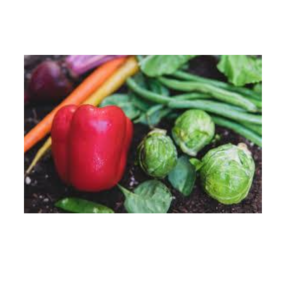

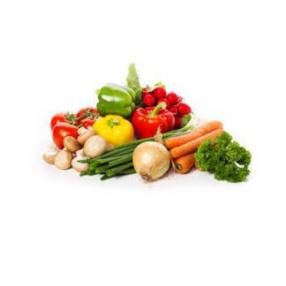

In [6]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

  *With this command and the ones above the algorithm is able to print out the images from my Google docs powerppoint file. Might I add this is astounishing.*

In [7]:
images.shape

torch.Size([50, 3, 224, 224])

*there are 50 images, 3 colors, and they are 224 pixels tall and 224 pixels wide* 

In [8]:
model(images)

tensor([[-5.8480,  0.4243, -7.5480,  ...,  2.1087, 11.3908, -1.5080],
        [-2.5574, -1.5773, -5.5941,  ..., -0.0158,  6.9132,  0.0810],
        [-4.0368, -2.1737, -4.8891,  ..., -0.4401,  6.6272,  0.2363],
        ...,
        [-4.3172,  5.6180, -6.5312,  ..., -4.0761,  6.5144,  2.1080],
        [-0.7273,  1.3182, -5.9686,  ...,  0.6072,  5.5910, -0.9883],
        [-2.0715,  3.6078, -9.5203,  ...,  1.5796,  6.6589,  0.8461]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

*This is how the images are classified. This assigned an input image to a lable from a fixed set of categories.*

In [9]:
y = model(images)

*Here we tell the algorithm that y means the categorized images; this way we no longer have to write "model(images)"*

In [10]:
y.shape

torch.Size([50, 1000])

*This means the 50 images are made of 1000 pixels.*

In [11]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [12]:
for i in list(guesses):
    print(labels[i])

spaghetti squash
bell pepper
ping-pong ball
corn
hair slide
hair slide
corn
strawberry
screen, CRT screen
hamper
hamper
lemon
corn
hamper
hotdog, hot dog, red hot
tennis ball
corn
hair slide
hair slide
hair slide
screen, CRT screen
hair slide
tennis ball
corn
bell pepper
hamper
hair slide
hair slide
hamper
hamper
corn
strawberry
doormat, welcome mat
doormat, welcome mat
hair slide
broccoli
broccoli
lemon
screen, CRT screen
hamper
cucumber, cuke
packet
wallet, billfold, notecase, pocketbook
pretzel
safety pin
hamper
hamper
hair slide
bell pepper
hair slide


*Here the algorithm describes the specific image that it sees to the best of its ability.*

In [13]:
Y = np.zeros(50,)
Y[25:] = 1

*My understanding of this one isn't percise, but from what I see if one image is 50 then the algotothim will name it 0 and if it's 25 then it'll be names 1.*

In [14]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

*Just as instructed above the algorithm names each image 1 or 0 based on the restrictions and qualifications that each image has.*

In [15]:
X = y.detach().cpu().numpy() 

In [16]:
X.shape

(50, 1000)

*Once more these are the measurments of the shapes of my images from my google slide*

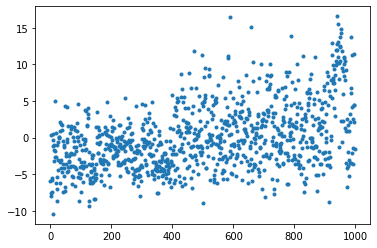

In [17]:
plt.plot(X[0],'.')

In [18]:
X[0]

array([-5.84798527e+00,  4.24273014e-01, -7.54799843e+00, -7.92918730e+00,
       -7.46161747e+00, -5.48325348e+00, -5.77288532e+00, -1.08024991e+00,
       -3.28045100e-01, -1.03998375e+01,  5.28009713e-01, -1.71194339e+00,
       -1.05742776e+00, -3.12242603e+00, -2.70371032e+00, -1.83068120e+00,
        4.96113491e+00,  6.50561571e-01, -6.21253872e+00, -2.59583879e+00,
       -5.36659718e+00, -7.02429628e+00, -8.66624832e+00, -1.03330231e+00,
       -4.45931911e+00, -5.79730451e-01, -2.99126124e+00, -8.16623271e-02,
        7.74540305e-02,  9.97346938e-02, -3.27360916e+00,  9.41801548e-01,
        2.17790222e+00, -6.16674137e+00, -4.16507435e+00, -3.04503632e+00,
        1.81887221e+00,  1.78513217e+00, -4.70657682e+00,  1.07071900e+00,
       -3.62316322e+00, -4.63984549e-01, -7.44055319e+00, -4.07412195e+00,
       -5.18584538e+00, -9.69858110e-01, -1.22821987e+00,  4.35107946e+00,
       -6.67487621e+00, -7.26706028e+00, -2.14839363e+00, -2.43388438e+00,
       -3.57315922e+00, -

In [19]:
np.argmax(X[0])

940

*this shows us the max*

In [20]:
labels[940]

'spaghetti squash'

*The number 940 is asking for the name of exactly what that image is to the algorithm*

In [21]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [22]:
for i in top_ten:
    print(labels[i])

spaghetti squash
hamper
bell pepper
mixing bowl
pineapple, ananas
banana
shopping basket
orange
corn
cucumber, cuke


*Here is the top 10 list of exactly what the algorithm sees*

In [23]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

*This is a list of all 1000 lables teh algorithm holds for the images in my google slides*

(array([ 13.,  95., 234., 258., 190.,  99.,  53.,  36.,  15.,   7.]),
 array([-10.3998375 ,  -7.704101  ,  -5.0083647 ,  -2.3126285 ,
          0.38310775,   3.078844  ,   5.7745805 ,   8.470317  ,
         11.166053  ,  13.86179   ,  16.557526  ], dtype=float32),
 <a list of 10 Patch objects>)

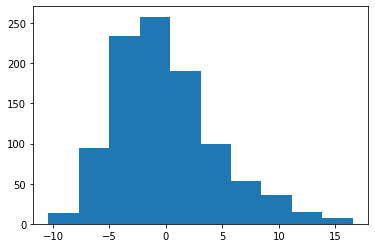

In [24]:
plt.hist(X[0])

In [25]:
X = GPU_data(X)
Y = GPU_data(Y)

In [26]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [27]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [28]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [29]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [30]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [31]:
X.shape

torch.Size([50, 1000])

In [32]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [33]:
def model(x,w):

    return x@w[0]

In [34]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/